In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from scipy import stats

In [2]:
rainfall = pd.read_csv ('C:/Users/dotha/PythonNotebook/File/rainfall (2017-2020) NYC.csv')
rainfall.fillna(0, inplace = True)
#make index a data column 
rainfall.index = pd.to_datetime(rainfall['Date'])
rainfall = rainfall.drop (['Date'], axis =1)


pm25 = pd.read_csv ('C:/Users/dotha/PythonNotebook/File/pm25 (2017-2020) NYC.csv')
#make index a data column 
pm25.index = pd.to_datetime(pm25['Date'])
pm25 = pm25.drop (['Date'], axis =1)
pm25.fillna(0,inplace = True)

In [3]:
pm25_series = pm25.pm25.resample('D').mean()
rainfall_array = rainfall['rainfall'].values.reshape(-1, 1)
pm25_array = pm25_series.values.reshape(-1, 1)


In [4]:
temperature = pd.read_csv ('C:/Users/dotha/PythonNotebook/File/temperature (2017-2020) NYC.csv')
temperature.fillna(0, inplace = True)
#make index a data column 
temperature.index = pd.to_datetime(temperature['DATE'])
temperature = temperature.drop (['DATE'], axis =1)
temperature_array = temperature['Temperature'].values.reshape(-1, 1)


# ********** mulple variable regression *****
df = pd.DataFrame({ 'temperature': temperature['Temperature'], 'rainfall': rainfall['rainfall']})
df['weekday'] = ((pd.DatetimeIndex(df.index).dayofweek) // 5 == 1).astype(int) #make dummy variable weekend


predictors = ['temperature', 'rainfall','weekday']
X = df[predictors]
y = pm25_array

regressor = LinearRegression()  
regressor.fit(X, y)
print(regressor.coef_)

[[-0.01149871 -1.62155529 -0.48392321]]


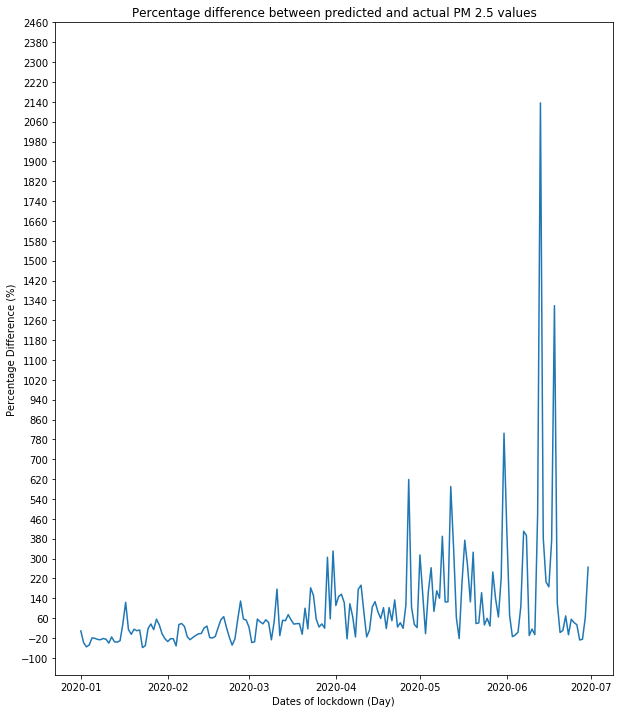

In [5]:
rainfall_test =  pd.read_csv ('C:/Users/dotha/PythonNotebook/File/rainfall (2020) NYC.csv')
#rainfall_test = rainfall_test[(rainfall_test['Date'] > '2020-02-29') & (rainfall_test['Date'] < '2020-07-01')]
rainfall_test.index = pd.to_datetime(rainfall_test['Date'])
rainfall_test = rainfall_test.drop(['Date'], axis =1 )


temperature_test =  pd.read_csv ('C:/Users/dotha/PythonNotebook/File/temperature (2020) NYC.csv')
#temperature_test = temperature_test[(temperature_test['Date'] > '2020-02-29') & (temperature_test['Date'] < '2020-07-01')]
temperature_test.index = pd.to_datetime(temperature_test['Date'])
temperature_test = temperature_test.drop(['Date'], axis =1 )



df1 = pd.DataFrame({'temperature': temperature_test['temperature'], 'rainfall': rainfall_test['rainfall']})
df1['weekday'] = ((pd.DatetimeIndex(df1.index).dayofweek) // 5 == 1).astype(int)
combined_variables = ['temperature','rainfall','weekday']
X1 = df1[combined_variables]



pm25_actual = pd.read_csv ('C:/Users/dotha/PythonNotebook/File/pm25 (2020) NYC.csv')
#pm25_actual = pm25_actual[(pm25_actual['Date Time'] > '2020-02-29') ]
pm25_actual.index = pd.to_datetime(pm25_actual['Date Time'])
pm25_actual = pm25_actual.drop (['Date Time'], axis =1)
pm25_actual.fillna(0,inplace = True)
pm25_actual_series = pm25_actual.PM25C.resample('D').mean() # take average daily
pm25_actual_array = pm25_actual_series.values



pm25_predicted_array = regressor.predict(X1)


random_list = []
pm25_predicted_array = pm25_predicted_array.reshape(-1)
pm25_actual_array= pm25_actual_array.reshape(-1)
for i in range(len(pm25_predicted_array)):
    #if pm25_actual_array[i]!=0:
    variable = ((pm25_predicted_array[i]-pm25_actual_array[i])/pm25_actual_array[i])*100
    random_list.append(variable)
random_list = np.asarray(random_list)


plt.figure(figsize=(10,12))
#plt.plot(temperature_test.index,pm25_actual_array, label ='actual')
#plt.plot(temperature_test.index,pm25_predicted_array, color = 'red', label = 'predicted')
plt.plot(temperature_test.index,random_list)
plt.yticks(np.arange(-100, 2500, 80))
plt.title('Percentage difference between predicted and actual PM 2.5 values')
plt.xlabel('Dates of lockdown (Day) ')
plt.ylabel('Percentage Difference (%)')
#plt.savefig("difference between predicted and actual pm25 (2018-2020).png",bbox_inches="tight",pad_inches=2)

plt.show()




